# Bharat Intern Task-1
This is the Solution Of Prediction of different species of flowers on the length of there petals & sepals.

 Let's start by importing the libraries that we will using

In [1]:
import pandas as pd
import numpy as np                                           # for mathematical operations
import seaborn as sb                                         # for data visualization
import matplotlib.pyplot as plt
import seaborn as sn                                         # for plotting graphs
%matplotlib inline                                           
import warnings                                              # to ignore any warnings
warnings.filterwarnings("ignore")

# Ioading the dataset
 

In [2]:
Data=pd.read_csv("IRIS.csv")  # for importing datasets
Data.head()   # to view first 5 rows of dataset                

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Data.shape # to obtain the dimensions of dataset

(150, 5)

In [4]:
Data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.037333,3.758667,1.198667
std,0.828066,0.389811,1.764420,0.763161
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


# Data preprocessing

Checking the datatype of all variables

In [5]:
Data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Changes the datatype of target variable "species" from categorical to numeric.

In [6]:
Data['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)
Data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Identification of missing values

In [7]:
Data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Identification of Outliers in dataset using Graphical methods

<Axes: >

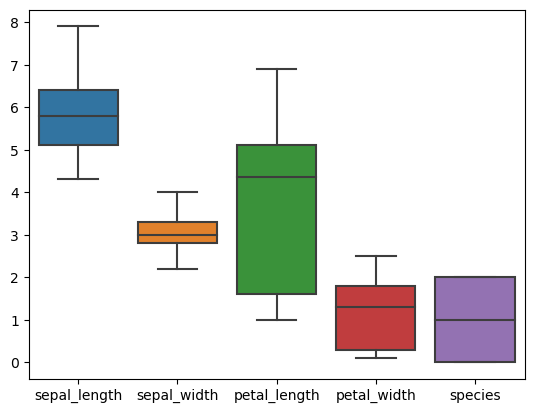

In [8]:
sn.boxplot(data=Data)

# New Data
Since we want to predict the species based on there length of sepal and petal we will build model on new data containing sepal_length,petal_length,species

In [9]:
N_Data=Data[['sepal_length','petal_length','species']]

In [10]:
N_Data.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


# Splitting the New dataset (N_Data)

In [11]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(N_Data.drop('species',axis=1),N_Data['species'],test_size=0.25)


In [12]:
# set of independent variables from train dataset
x_train.head()

,sepal_length,petal_length
17,5.1,1.4
19,5.1,1.5
135,7.7,6.1
2,4.7,1.3
145,6.7,5.2


In [13]:
# set of dependent variable from train dataset
y_train.head()

17     0
19     0
135    2
2      0
145    2
Name: species, dtype: int64

In [14]:
# set of independent variable from test dataset
x_test.head()

,sepal_length,petal_length
25,5.0,1.6
40,5.0,1.3
111,6.4,5.3
108,6.7,5.8
102,7.1,5.9


In [15]:
# set of dependent variable from test datset
y_test.head()

25     0
40     0
111    2
108    2
102    2
Name: species, dtype: int64

# Model Building

In [16]:
# importing linear regression 
from sklearn.linear_model import LogisticRegression


In [17]:
# creating object
lreg=LogisticRegression()

# Fitting the training data

In [18]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [19]:
# making prediction on test dataset
pred=lreg.predict(x_test)
pred

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2], dtype=int64)

# Accuracy Checking

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,pred)

0.9473684210526315

The accuracy of the builded model is 94.7%